![IES21](img/logo_ies.png)

### SP02_Clase01b 

# k-NN con Scikit-Learn para Clasificación

Como siempre vamos a aplicar nuestro esquema de trabajo:  

- **Datos**
    - Carga de Datos
    - Train y Test Sets
    - Adaptación de los Datos para Scikit-Learn 
        - **X | y** por separado
        - deben ser de dimensión 2 (filas y columnas)
    

- **Modelo**
    - Creación del Modelo
    - Training con fit
    - Parámetros del modelo (si los tiene!)  o visualización en el caso del Árbol.
    

- **Evaluación** del Modelo según corresponda
    - Clasificación:
        - Accuracy
        - F1
        - Confussion Matrix
        - AUC (todavía no lo vimos)
        - Otros (si corresponde)
    - Regresión:
        - $R^2$ Coeficiente de Determinación
        - MSE: Mean Square Error
        - RMSE: Root Mean Square Error
        - Otros (si corresponde)
    

Veamos qué elementos nos provee sklearn para los problemas de los vecinos más cercanos. 

In [ ]:
import numpy as np
import pandas as pd


# El problema

Vamos a encarar un problema de Clasificación, usaremos un viejo conocido el dataset **Iris**, pronosticaremos el valor de iris basándonos sólo en 2 features (para poder visualizar).

## Datos

El dataset iris.tab lo encontrará en *data/iris.tab*, recordemos que el separador era TAB (/t) y que las dos primeras filas no contenían datos

### Carga de los datos

In [ ]:
df_iris=pd.read_csv("data/iris.tab",sep='\t',skiprows=(1,2))
df_iris.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Sólo a los efectos didácticos y para que podamos visualizar un poco vamos a quedarnos sólo con 2 variables predictivas X, sepal length y sepal width y el target será iris

In [ ]:
df=df_iris[['sepal length','sepal width','iris']]
df

,sepal length,sepal width,iris
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


le voy a cambiar los nombres a las columnas, por si diera error

In [ ]:
df.columns=['sl','sw','iris']

In [ ]:
df.head()

,sl,sw,iris
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


### Train y Test Sets

Vamos a separar en 80/20 y para la siembra usaremos 123

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2,random_state=123)

### Adaptamos los datos para Scikit-Learn

In [ ]:
X_train=df_train[['sl','sw']]
y_train=df_train[['iris']]

In [ ]:
X_test=df_test[['sl','sw']]
y_test=df_test[['iris']]

### Modelo kNN

Vamos a elegir un valor para la cantidad de vecinos que participarán en la votación, digamos **k=5** que es el valor que utiliza por defecto sklearn.

In [ ]:
k=5 

In [ ]:
from sklearn import neighbors
modelo = neighbors.KNeighborsClassifier(n_neighbors=k,weights='uniform')

### Entrenamos con fit

kNN es uno de los pocos casos en sklearn donde los datos de entrada no deben ser de dimensión 2, seguramente le aparecerá un warning en fondo rojo, pero lo ejecutará igual.

In [ ]:
# sólo para que no muestre el Warning
import warnings
warnings.simplefilter('ignore')


modelo.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Pronosticamos los resultados para el X_test

In [ ]:
y_pred=modelo.predict(X_test)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [ ]:
y_test.head()

,iris
72,Iris-versicolor
112,Iris-virginica
132,Iris-virginica
88,Iris-versicolor
37,Iris-setosa


### Evaluación

Para un caso de Clasificación podemos evaluar con 

- Confusion Matrix para visualizar
- Accuracy
- F1

Todas estas métricas se encuentran en: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- para confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix  

- para Accuracy: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score  

- para F1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score  # Lo Evaluamos

CM=confusion_matrix(y_test,y_pred)  # la repasaremos luego, por ahora veamos cómo se calcula
CM

array([[13,  0,  0],
       [ 0,  4,  2],
       [ 0,  6,  5]], dtype=int64)

In [ ]:
# df.iris.unique()                 # va a ayudar a comprender Confusion Matrix

In [ ]:
AC=accuracy_score(y_test, y_pred)

In [ ]:
F1=f1_score(y_test,y_pred, average='macro')  # average: si sólo son 2 clases en y, no es necesario seleccionar nada, 
                                             # en nuestro caso son 3. Si usamos la opción 'micro' el resultado es el
                                             # mismo que para Accuracy.

In [ ]:
print("Evaluación modelo kNN")
print("Accuracy: ", round(AC,3))
print("F1: ", round(F1,3))

Evaluación modelo kNN
Accuracy:  0.733
F1:  0.685


### Visualización

Hasta aquí los cálculos que queríamos hacer, en este caso como estamos trabajando con sólo 2 variables, podríamos visualizar la ubicación de los puntos y si serán fácilmente separables o no.  

> Si vamos a utilizar las herramientas de visualización, **debemos usarlas sobre el Train Set** ... no nos olvidemos que **no debemos aprender nada del Test Set** sino la evaluación del modelo será fallida.

In [ ]:
# Voy a necesitar conocer los valores que toman las etiquetas de la columna iris
df_train.iris.unique()

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

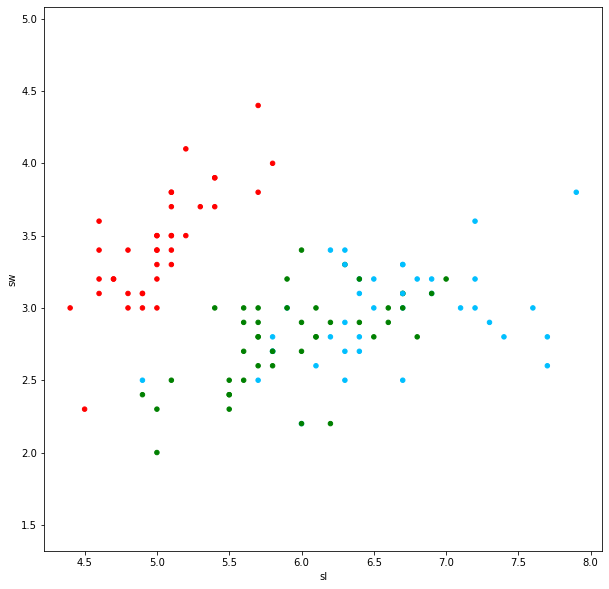

In [ ]:
import matplotlib.pyplot as plt
# Hacemos el scatter plot
# quiero asignar un color distinto a cada etiqueta:

# Iris-virginica: celeste
# Iris-setosa: rojo
# Iris-versicolor: verde

colores=np.where(df_train.iris=='Iris-virginica','deepskyblue',np.where(df_train.iris=='Iris-setosa','red','green'))

fig1=df_train.plot(kind='scatter', x='sl',y='sw',color=colores, marker='o',s=20,figsize=[10,10])
plt.axis('equal')
plt.show()

Lo anterior, sí podría aprender a hacerlo ahora, es relativamente sencillo.  

Lo siguiente no es necesario sólo es a los fines didácticos.

Vamos a agregar la ubicación de la primer observación que tenemos en el Test_Set para ver por dónde está:

In [ ]:
df_test.iloc[0,:]

sl                  6.3
sw                  2.5
iris    Iris-versicolor
Name: 72, dtype: object

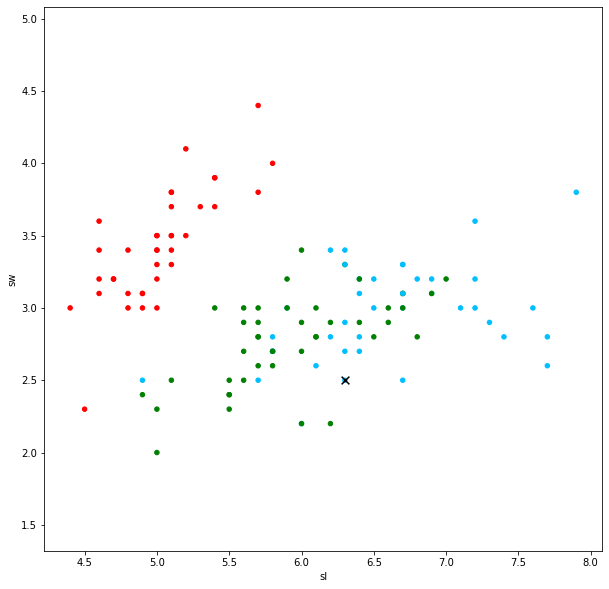

In [ ]:
fig1=df_train.plot(kind='scatter', x='sl',y='sw',color=colores, marker='o',s=20,figsize=[10,10])
plt.scatter(df_test.iloc[0,0],df_test.iloc[0,1],color='black',marker='x', s=60)
plt.axis('equal')
plt.show()

A simple vista parece que los k=5 puntos más cercanos son celestes, por lo cual el pronóstico debería ser Iris-virginica.  
Veamos qué pronosticó 

In [ ]:
y_pred[0]

'Iris-virginica'

OK, el modelo arrojó lo que observamos, veamos cuál es el valor real:

In [ ]:
y_test.iloc[0]     # tuvimos que usar .iloc porque y_test es un DataFrame de Pandas

iris    Iris-versicolor
Name: 72, dtype: object

Era versicolor!  
Parece prácticamente imposible que sólo con esas dos variables cualquier modelo hubiera podido dar ese resultado.

Juguemos un poco más, veamos la situación de la siquiente observación del test set

In [ ]:
df_test.iloc[1,:]

sl                 6.8
sw                   3
iris    Iris-virginica
Name: 112, dtype: object

ubiquémosla en el plano:

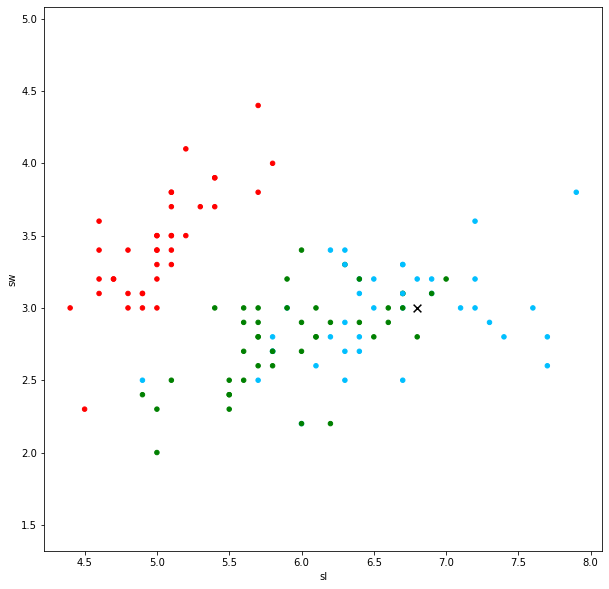

In [ ]:
fig1=df_train.plot(kind='scatter', x='sl',y='sw',color=colores, marker='o',s=20,figsize=[10,10])
plt.scatter(df_test.iloc[1,0],df_test.iloc[1,1],color='black',marker='x', s=60)
plt.axis('equal')
plt.show()

A ojo cuesta un poco distinguir cuáles son los 5 puntos más cercanos, pero a mí me parce que ganan los verdes, y el verde le corresponde a versicolor:

In [ ]:
y_pred[1]

'Iris-versicolor'

pero en el test el valor real era:

In [ ]:
y_test.iloc[1]

iris    Iris-virginica
Name: 112, dtype: object

Virginica ... 

Vamos con un par más:

In [ ]:
df_test.iloc[2,:]

sl                 6.4
sw                 2.8
iris    Iris-virginica
Name: 132, dtype: object

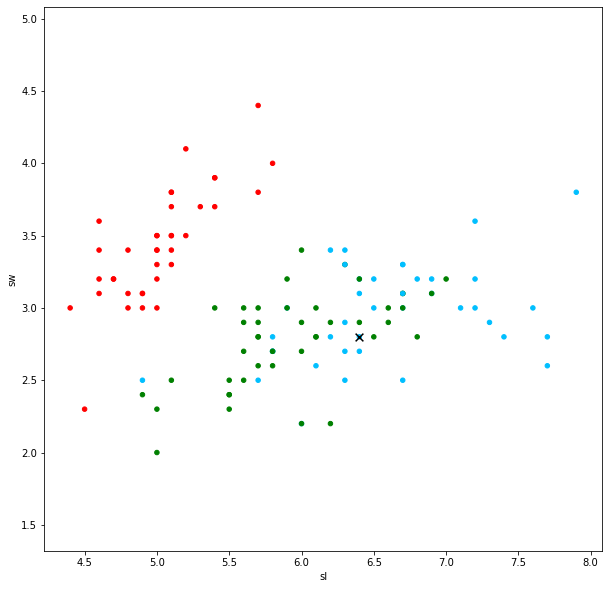

In [ ]:
fig1=df_train.plot(kind='scatter', x='sl',y='sw',color=colores, marker='o',s=20,figsize=[10,10])
plt.scatter(df_test.iloc[2,0],df_test.iloc[2,1],color='black',marker='x', s=60)
plt.axis('equal')
plt.show()

In [ ]:
y_pred[2]

'Iris-virginica'

In [ ]:
y_test.iloc[2]

iris    Iris-virginica
Name: 132, dtype: object

Otra, en algún momento tiene que empezar a acertar, ya que AC={{round(AC,3)}}

In [ ]:
df_test.iloc[3,:]

sl                  5.6
sw                    3
iris    Iris-versicolor
Name: 88, dtype: object

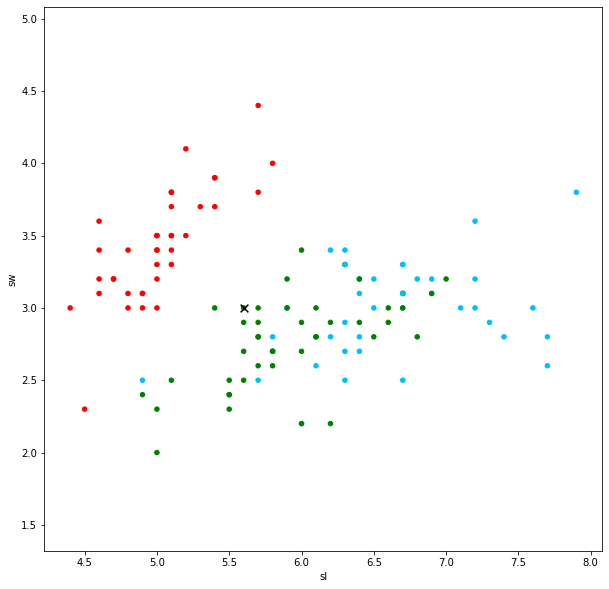

In [ ]:
fig1=df_train.plot(kind='scatter', x='sl',y='sw',color=colores, marker='o',s=20,figsize=[10,10])
plt.scatter(df_test.iloc[3,0],df_test.iloc[3,1],color='black',marker='x', s=60)
plt.axis('equal')
plt.show()

In [ ]:
y_pred[3]

'Iris-versicolor'

In [ ]:
y_test.iloc[3]

iris    Iris-versicolor
Name: 88, dtype: object

Acertó!

Puede probar unos cuantos casos más, el resultado final ya sabemos que es un 77% de aciertos, pero es interesante ver cómo los va encontrando!

A continuación veamos cómo usar Scikit-Learn para aplicar kNN en un problema de Regresión. Vea el archivo SP02_Clase01c